<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Phantoms" data-toc-modified-id="Phantoms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Phantoms</a></span><ul class="toc-item"><li><span><a href="#Variable-Definitions" data-toc-modified-id="Variable-Definitions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Variable Definitions</a></span></li><li><span><a href="#Water-Phantom" data-toc-modified-id="Water-Phantom-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Water Phantom</a></span></li><li><span><a href="#Fat-Phantom" data-toc-modified-id="Fat-Phantom-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fat-Phantom</a></span></li></ul></li><li><span><a href="#Two-Point-DIXON" data-toc-modified-id="Two-Point-DIXON-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Two Point DIXON</a></span><ul class="toc-item"><li><span><a href="#Equation-of-2-Images" data-toc-modified-id="Equation-of-2-Images-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Equation of 2 Images</a></span></li><li><span><a href="#Fat-Water-Phantom-Images" data-toc-modified-id="Fat-Water-Phantom-Images-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fat-Water Phantom Images</a></span></li><li><span><a href="#Applying-Equation-5-&amp;-6-to-obtain-$m_w$-&amp;-$m_f$" data-toc-modified-id="Applying-Equation-5-&amp;-6-to-obtain-$m_w$-&amp;-$m_f$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Applying Equation 5 &amp; 6 to obtain $m_w$ &amp; $m_f$</a></span></li></ul></li><li><span><a href="#Three-Point-DIXON-Methods" data-toc-modified-id="Three-Point-DIXON-Methods-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Three Point DIXON Methods</a></span><ul class="toc-item"><li><span><a href="#Estimate-of-$\hat{m}_w$-for-$\phi$-=--$\pi$" data-toc-modified-id="Estimate-of-$\hat{m}_w$-for-$\phi$-=--$\pi$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Estimate of $\hat{m}_w$ for $\phi$ =  $\pi$</a></span></li><li><span><a href="#Estimate-of-$\hat{m}_w$-with-a-known-off-Resonance-frequency,-$\omega$" data-toc-modified-id="Estimate-of-$\hat{m}_w$-with-a-known-off-Resonance-frequency,-$\omega$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Estimate of $\hat{m}_w$ with a known off Resonance frequency, $\omega$</a></span></li></ul></li><li><span><a href="#Two-Point-Dixon,-Revisited" data-toc-modified-id="Two-Point-Dixon,-Revisited-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Two Point Dixon, Revisited</a></span></li></ul></div>

In [1]:
import matplotlib.pylab as plt
import numpy as np
import math
import plot
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))
# Modules
from mpl_toolkits.axes_grid1 import ImageGrid
import ipywidgets as widgets
from ipywidgets import interact, interactive_output, HBox
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Fat-Water Relaxation

## Phantoms

### Variable Definitions

* sig = signal
* tn = echo time
* m_w = amplitude of water
* m_w = amplitude of fat signal
* t2_star = transverse relaxation time
* f_h = magnetic field inhomogneity
* del_f = frequency shift ith fat peak wrt water peak, off resonance frequency
* alpha_i = relative fat signal amplitude
* gamma_water = frequency of precession of water
* gamma_fat = frequency of precession of fat
* B = magnetic field

### Water Phantom

In [2]:

g_w = np.array([[1,1,1,0],
                  [1,1,0,0],
                  [1,1,0,0],
                  [1,0,0,0]])
perc_w = np.array([[1,0.75,0.25,0],[1,0.75,0.25,0],[1,0.75,0.25,0],[1,0.75,0.25,0]])
m_w = perc_w

### Fat-Phantom

In [3]:
g_f = np.array([[0,0,0,1],
                [0,0,1,1],
                [0,0,1,1],
                [0,1,1,1]])
perc_f = np.array([[0,0.25,0.75,1],[0,0.25,0.75,1],[0,0.25,0.75,1],[0,0.25,0.75,1]])
m_f = perc_f

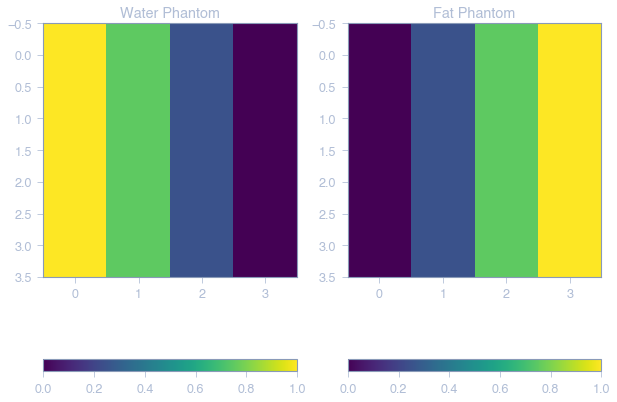

In [4]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(np.abs(m_w))
plt.title('Water Phantom')
plt.colorbar(orientation='horizontal')

plt.subplot(122)
plt.imshow(np.abs(m_f))
plt.title('Fat Phantom')
plt.colorbar(orientation='horizontal')

## Two Point DIXON

### Equation of 2 Images

The simplest approach uses only two images.
The basic assumption is that there are only two
components in the image, water and fat. If $m_w$ is
the image of the water component, and $m_f$ is the
image of the fat component, the combined image
at an echo time $T_E,i$ is

\begin{equation*}
m_i   = m_w + e^{-i\omega_fT_{E,i}}m_f
\tag{1}
\end{equation*}

where we have assumed, for convenience, that we
are exactly on the water resonance, so only the
lipid component precesses at $\omega_f$ .We choose $T_E,i$ so that

\begin{equation*}
\omega_fT_{E,i}= {0,\pi,mod (2\pi)}
\tag{2}
\end{equation*}

The two imgaes that result are

$$
\begin{align}
m_1   = m_w + m_f
\tag{3} \\
m_2   = m_w - m_f
\tag{4}
\end{align}
$$ 

We can then combine these to make images that contain only water, or only fat

$$
\begin{align}
m_w   = \frac12[m_1 + m_2]
\tag{5} \\
m_f   = \frac12[m_1 - m_2]
\tag{6}
\end{align}
$$

### Fat-Water Phantom Images

In [5]:
m1 = m_w + m_f
m2 = m_w - m_f

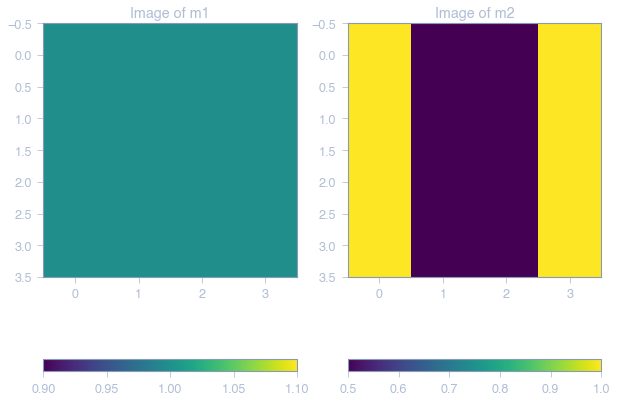

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(np.abs(m1))
plt.title('Image of m1')
plt.colorbar(orientation='horizontal')

plt.subplot(122)
plt.imshow(np.abs(m2))
plt.title('Image of m2')
plt.colorbar(orientation='horizontal')

### Applying Equation 5 & 6 to obtain $m_w$ & $m_f$

In [7]:
m_w_5 = .5*(m1 + m2)
m_f_6 = .5*(m1 - m2)

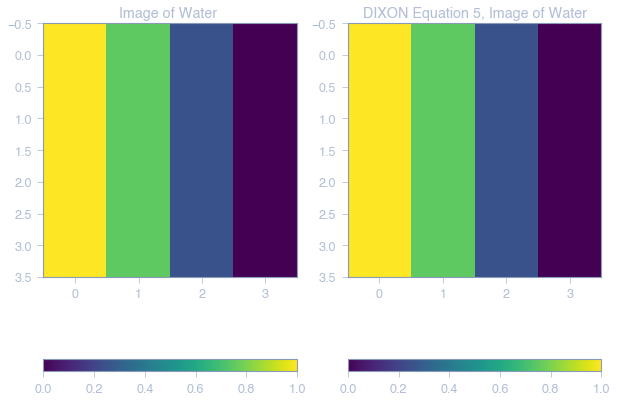

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(np.abs(m_w_5))
plt.title('Image of Water ')
plt.colorbar(orientation='horizontal')

plt.subplot(122)
plt.imshow(np.abs(m_w))
plt.title('DIXON Equation 5, Image of Water')
plt.colorbar(orientation='horizontal')

In [9]:
print(np.abs(m_w_5))

[[1.   0.75 0.25 0.  ]
 [1.   0.75 0.25 0.  ]
 [1.   0.75 0.25 0.  ]
 [1.   0.75 0.25 0.  ]]


In [10]:
print(np.abs(m_w))

[[1.   0.75 0.25 0.  ]
 [1.   0.75 0.25 0.  ]
 [1.   0.75 0.25 0.  ]
 [1.   0.75 0.25 0.  ]]


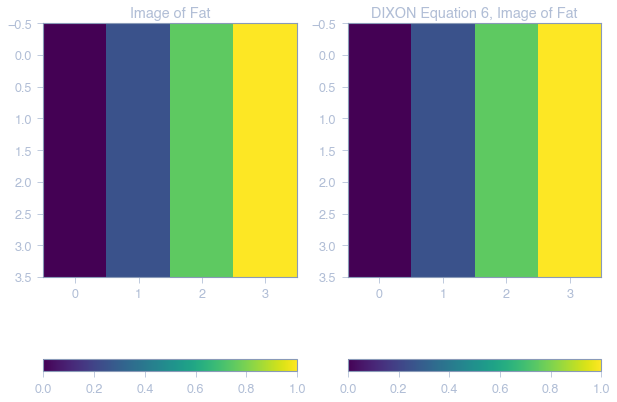

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(np.abs(m_f_6))
plt.title('Image of Fat')
plt.colorbar(orientation='horizontal')

plt.subplot(122)
plt.imshow(np.abs(m_f))
plt.title('DIXON Equation 6, Image of Fat')
plt.colorbar(orientation='horizontal')

In [12]:
print(np.abs(m_f_6))

[[0.   0.25 0.75 1.  ]
 [0.   0.25 0.75 1.  ]
 [0.   0.25 0.75 1.  ]
 [0.   0.25 0.75 1.  ]]


In [13]:
print(np.abs(m_f))

[[0.   0.25 0.75 1.  ]
 [0.   0.25 0.75 1.  ]
 [0.   0.25 0.75 1.  ]
 [0.   0.25 0.75 1.  ]]


The problem with this approach is that there are
other factors that confound the decomposition.
The major factor is the off-resonance frequency
shift $w$ that produces phase errors. Another factor
is the $T_2$ decay of signal at increasing echo times.
For spin echoes, the decay may be kept constant by
changing the echo time by shifting the refocusing
pulse. In gradient-recalled acquisitions, $T_2$ decay
will be a concern.

Of these two factors, the problem of the offresonance
frequency $w$ is by far the most important.
The estimation and correction for $T{_2}{^*}$
degrades the separation between fat and water
slightly, but is of secondary concern. We will ignore
this effect here,primary concern here is correcting for the effect of
off-resonance frequency.

The two images that result are

$$
\begin{align}
m_1   = (m_w + m_f)e^{i\phi_0}
\tag{7} \\
m_2   = (m_w - m_f)e^{i(\phi_0+\phi)}
\tag{8}
\end{align}
$$

where

\begin{equation*}
\phi_0 = -\omega{T_{E,1}}
\tag{9}
\end{equation*}

and the phase due to the precession between two echoes is

\begin{equation*}
\phi = -\omega({T_{E,2} - T_{E,1}})
\tag{9}
\end{equation*}

The initial phase $\phi_0$ can be computed from $m_1$ and
eliminated from both terms, so we neglect it. The estimate 
$\hat{m}_w$ is then

$$
\begin{align}
\hat{m}_w   = \frac12(m_1 + m_2)
\tag{10}\\
            =\frac12[m_w(1 + e^{i\phi}) 
\tag{11}\\
                + m_f(1 - e^{i\phi})]
\tag{12}\\
\end{align}
$$

In [14]:
te1 = 2.6
w = 2*np.pi*400*4.7
phi_not = w*te1

In [15]:
te2 = 3.0
phi = w*(te2-te1)

In [16]:
m1_7 = (m_w + m_f)*np.exp(1j*(phi_not))
m2_8 = (m_w - m_f)*np.exp(1j*(phi_not+phi))
m_hat_w_10 = 0.5*(m1_7 + m2_8)

e_11 = m_w*(1+np.exp(1j*phi))
e_12 = m_f*(1-np.exp(1j*phi))
m_hat_w_11_12 = 0.5*(e_11+e_12)

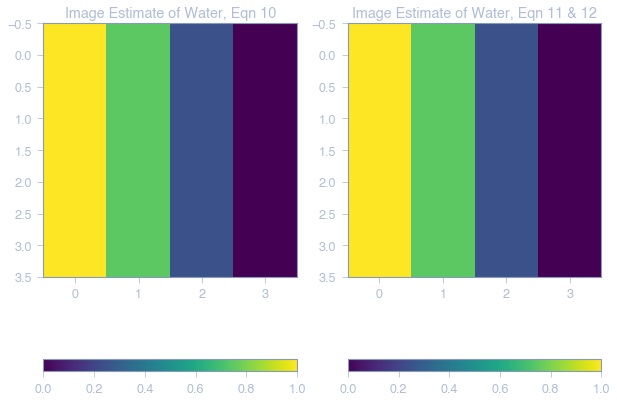

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(np.abs(m_hat_w_10))
plt.title('Image Estimate of Water, Eqn 10')
plt.colorbar(orientation='horizontal')

plt.subplot(122)
plt.imshow(np.abs(m_hat_w_11_12))
plt.title('Image Estimate of Water, Eqn 11 & 12')
plt.colorbar(orientation='horizontal')

## Three Point DIXON Methods

One alternative is to add an additional measurement
to allow the off-resonance frequency $w$ to
be estimated. The original proposal [2] was for
spin-echo acquisitions, and used measurements at
$\pi$, 0, and $2\pi$ The echoes were symmetrically distributed
about the spin echo.

A better choice that also works for gradient echoes
is to pick $T_{E,i}$'s such that:

\begin{equation*}
\omega_fT_{E,i}= {0,\pi,2\pi}
\tag{13}
\end{equation*}


Neglecting $\phi_0$ as before, the three images can be written

$$
\begin{align}
m_1   = (m_w + m_f)
\tag{14} \\
m_2   = (m_w - m_f)e^{i\phi}
\tag{15} \\
m_3   = (m_w + m_f)e^{i2\phi}
\tag{16}
\end{align}
$$

from images $m_1$ and $m_3$ we can estimate

$$
\begin{equation*}
2\hat{\phi} = \angle m_1^*m_3
\tag{17}
\end{equation*}
$$

We can then phase correct $m_2$, and combine $m_1$ to compute $\hat{m}_w$,

$$
\begin{align}
\hat{m}_w   = \frac12(m_1 + m_2e^{-i\hat{\phi}})
\tag{18}\\
            =\frac12((m_w + m_f) 
\tag{19}\\
            + (m_w - m_f)e^{i\phi}e^{-i\hat{\phi}})
\tag{20}\\
            = \frac12((m_w(1 + e^{i(\phi-\hat{\phi})})
\tag{21}\\
            + m_f(1 - e^{i(\phi-\hat{\phi})}))
\tag{22}\\
\end{align}
$$

### Estimate of $\hat{m}_w$ for $\phi$ =  $\pi$

In [18]:
def plot_fig(mw_est1,mw_est2,mw_est3,r,c):
    plt.figure(figsize=(r,c))
    
    plt.subplot(131)
    plt.title('Water Image Estimate, Eqn 18 ')
    plt.imshow(np.abs(mw_est1))
    #plt.subplots_adjust(hspace=0)
    plt.subplots_adjust(wspace=0.2)

    plt.subplot(132)
    plt.title('Water Image Estimate, Eqn 19 ')
    plt.imshow(np.abs(mw_est2))
    #plt.subplots_adjust(hspace=0.1)
    plt.subplots_adjust(wspace=0.2)

    plt.subplot(133)
    plt.title('Water Image Estimate, Eqn 21 ')
    plt.imshow(np.abs(mw_est3))
    #plt.subplots_adjust(hspace=0.1)
    plt.subplots_adjust(wspace=0.2)

In [19]:
m_w = np.array([[1,0.75,0.25,0],[1,0.75,0.25,0],[1,0.75,0.25,0],[1,0.75,0.25,0]])
m_f = np.array([[0,0.25,0.75,1],[0,0.25,0.75,1],[0,0.25,0.75,1],[0,0.25,0.75,1]])

In [20]:
te1 = 2.6
w = 2*np.pi*400*4.7
phi_not = w*te1

In [21]:
te2_pi = (phi_not+np.pi)/w
te2_pi

2.6002659574468088

In [22]:
phi_pi = w*(te2-te1)

In [23]:
m1_14 = (m_w + m_f)
m2_15 = (m_w - m_f)*np.exp(1j*phi_pi)
m3_16 = (m_w + m_f)*np.exp(1j*2*phi)

phi_hat = 0.5*np.angle(np.conj(m1_14)*m3_16)

m_hat_w_18_pi = 0.5*(m1_14 + m2_15*np.exp(-1j*phi_hat))
m_hat_w_19_pi = 0.5*((m_w + m_f) + (m_w - m_f)*np.exp(1j*phi_pi)*np.exp(1j*phi_hat))
m_hat_w_21_pi = 0.5*(m_w*(1 + np.exp(1j*(phi_pi+phi_hat))) + m_f*(1 - np.exp(1j*(phi_pi+phi_hat))))

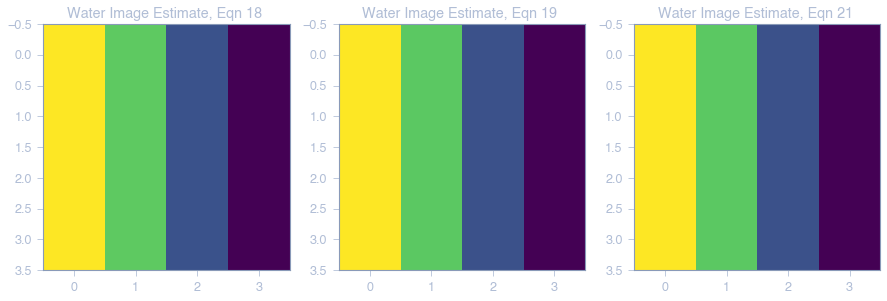

In [24]:
plot_fig(m_hat_w_18_pi,m_hat_w_19_pi,m_hat_w_21_pi,15,15)

### Estimate of $\hat{m}_w$ with a known off Resonance frequency, $\omega$

In [25]:
te1 = 2.6
w = 2*np.pi*400*4.7
phi = w*te1

In [26]:
te2 = (phi_not+2*np.pi)/w
te2

2.6005319148936175

In [27]:
phi = w*(te2-te1)

In [28]:
m1_14 = (m_w + m_f)
m2_15 = (m_w - m_f)*np.exp(1j*phi)
m3_16 = (m_w + m_f)*np.exp(1j*2*phi)

phi_hat = 0.5*np.angle(np.conj(m1_14)*m3_16)

m_hat_w_18 = 0.5*(m1_14 + m2_15*np.exp(-1j*phi_hat))
m_hat_w_19 = 0.5*((m_w + m_f) + (m_w - m_f)*np.exp(1j*phi)*np.exp(1j*phi_hat))
m_hat_w_21 = 0.5*(m_w*(1 + np.exp(1j*(phi+phi_hat))) + m_f*(1 - np.exp(1j*(phi+phi_hat))))

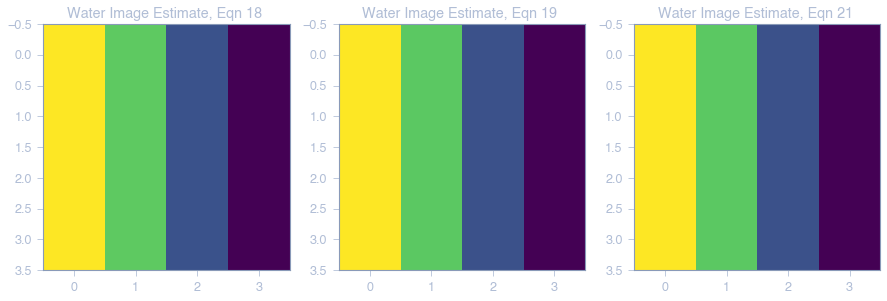

In [29]:
plot_fig(m_hat_w_18,m_hat_w_19,m_hat_w_21,15,15)

A similar expression can be written for $m_f$ . If
$\phi$ = $\hat{\phi}$ the reconstruction is correct. However there
is a problem if the phase of $\phi$ exceeds 2$\pi$.

The source of the problem is that the term 2$\hat{\phi}$ is
itself phase wrapped at 2$\pi$. This means that that
$\hat{\phi}$ itself wraps at $\pi$. After the first wrap of 2$\hat{\phi}$.

\begin{equation*}
\phi- \hat{\phi} = \pi
\tag{23}
\end{equation*}



If we substitute this in to Eq. 22

$$
\begin{align}
\hat{m}_w   = \frac12(m_w( 1 + e^{i\pi})
\tag{24}\\
            + m_f( 1 - e^{i\pi} ))
\tag{25}\\
            = \frac12(m_w( 1 + (-1))  
\tag{26}\\
            + m_f(1 - (-1))))
\tag{27}\\
            = m_f!
\tag{28}\\
\end{align}
$$

This means that each time 2$\hat{\phi}$ wraps by another 2$\pi$,
water and fat swap. This is an objectionable artifact.
Another consequence is that, even if the two
do separate properly, you can’t tell which will be
the water image. This is easily detectable, but unfortunate,
since water is usually the image of interest.
Row 2 demonstrates the water/fat switching
due to a 2$\pi$ phase wrap in 2$\hat{\phi}$.

## Two Point Dixon, Revisited

The main function of the third measurement $m_3$ in equation 16 is to allow the estimation 
of 2$\hat{\phi}$ by computing 

$$
\begin{equation*}
2\hat{\phi} = \angle m_1^*m_3
\tag{17}
\end{equation*}
$$

We can also do this with

$$
\begin{equation*}
2\hat{\phi} = \angle (m_1^*m_2)^2
\tag{29}
\end{equation*}
$$

This effectively synthesizes the third three-point
Dixon measurement from the two-point data set.
The reason we need to do this using $m_1m_2$ is that
water and fat have opposite polarities, and that 
would appear in the phase estimate. By squaring
the phase difference, water and fat are again in
phase, and we can extract the off-resonance component
of the phase

In [30]:
m1_14 = (m_w + m_f)
m2_15 = (m_w - m_f)*np.exp(1j*phi)

phi_hat_29 = 0.5*np.angle(np.power((np.conj(m1_14)*m2_15),2))

m_hat_w_18_d2 = 0.5*(m1_14 + m2_15*np.exp(-1j*phi_hat_29))
m_hat_w_19_d2 = 0.5*((m_w + m_f) + (m_w - m_f)*np.exp(1j*phi)*np.exp(1j*phi_hat_29))
m_hat_w_21_d2 = 0.5*(m_w*(1 + np.exp(1j*(phi+phi_hat_29))) + m_f*(1 - np.exp(1j*(phi+phi_hat_29))))

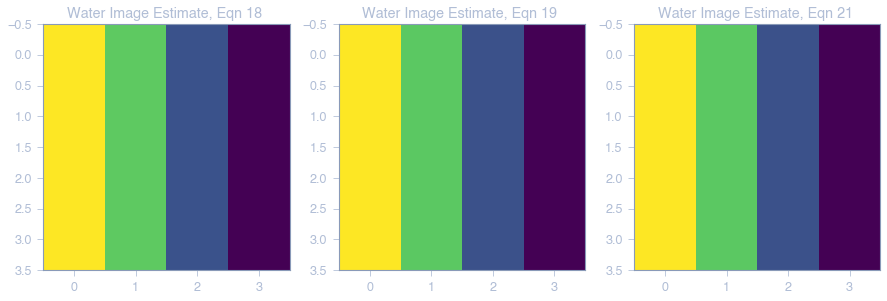

In [31]:
plot_fig(m_hat_w_18_d2,m_hat_w_19_d2,m_hat_w_21_d2,15,15)

While this is a great idea, in
practice its use is limited due to the performance
at pixels that have a contribution from both water
and fat. Since fat shifts in the readout direction
in a 2DFT acquisition, this includes pixels on the
fat/water boundary. At these points fat and water
interfere, resulting in phase anomalies, and separation
failures.